In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import seaborn as sns

sns.set_style('darkgrid')

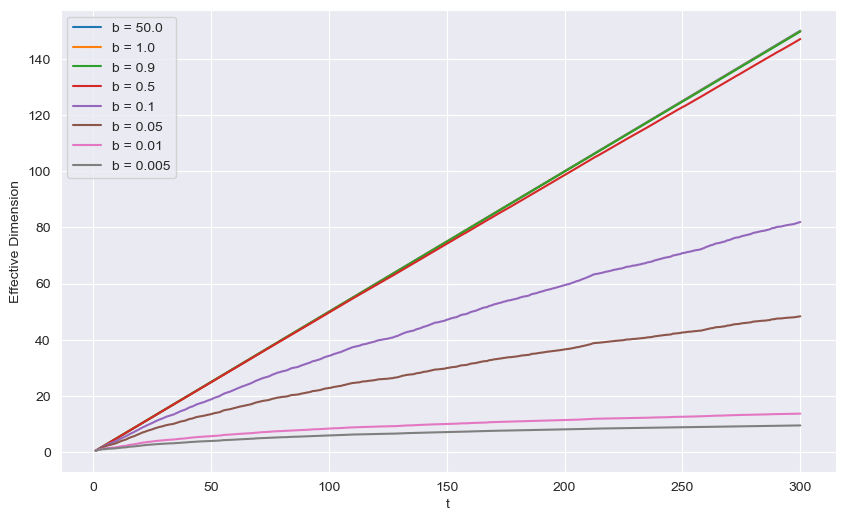

In [10]:
# Function to generate the design matrix X
def generate_design_matrix(n, m):
    return np.random.randn(n, m)

# Function to compute the Gaussian kernel matrix with gamma parameter
# with gamma = 1/2w^2 and w^2 the kernel width.
def gaussian_kernel_matrix(X, gamma):
    pairwise_sq_dists = cdist(X, X, 'sqeuclidean')
    return np.exp(-gamma * pairwise_sq_dists)

# Function to compute the effective dimension for a given t and eta
def effective_dimension(K_t, eta):
    return np.trace(K_t @ np.linalg.inv(K_t + eta * np.identity(K_t.shape[0])))

# Parameters for the design matrix
n = 300  # number of samples
m = 10   # dimensionality of each sample

# Generate the design matrix
X = generate_design_matrix(n, m)

# Gammas to iterate over
gammas = [50.0, 1.0, 0.9, 0.5, 0.1, 0.05, 0.01, 0.005]


# Eta parameter for the effective dimension
eta = 1.0

# Calculate effective dimension for each gamma and plot
plt.figure(figsize=(10, 6))
for gamma in gammas:
    # Compute the full Gaussian kernel matrix for the current gamma
    K = gaussian_kernel_matrix(X, gamma)
    effective_dims = []
    for t in range(1, n + 1):
        # Compute the effective dimension for the principle t x t submatrix
        K_t = K[:t, :t]
        eff_dim = effective_dimension(K_t, eta)
        effective_dims.append(eff_dim)

    # Plot the effective dimension for the current gamma
    plt.plot(range(1, n + 1), effective_dims, label=f'b = {gamma}')

# Add plot details
plt.xlabel('t')
plt.ylabel('Effective Dimension')
#plt.title(f'effective dimension for different Gaussian gamma values, eta={eta}')
plt.legend()

In [11]:
plt.savefig('deff_constants.pdf')